# **Laboratorio #2. Generación y análisis de señales.**
**Estudiante: Luna Katalina Quintero Jiménez, T00068464.**

**I. Introducción**

En este informe de laboratorio se encuentran señales en tiempo continuo y discreto utilizando Python para sus representaciones mediante arreglos unidimensionales. Se definieron las señales de tiempo discreto a través de funciones matemáticas y por otro lado, se obtuvieron representaciones precisas mediante el muestreo periódico de valores de amplitud y funciones matemáticas de las señales en tiempo continuo.

En este laboratorio fueron necesarias las librerías Matplotlib, Numpy y Scipy que suministran funciones para graficar, definir y realizar operaciones con arreglos que representan las señales que se muestran a lo largo de este informe. Además de estas representaciones gráficas y matemáticas de las señales, se hizo uso del paquete IPython con el fin de generar señales de audio, tales como notas musicales, esto amplió aún más la manera en que se pueden representar y percibir las señales.

**II. Marco teórico.**

En esta sección se abordarán temas importantes para la comprensión de este laboratorio, en el informe anterior se presentaron las definiciones de las librerías Matplotlib y NumPy que fueron utilizadas, para este laboratorio volvemos a utilizarlas, pero en adición con otra librería de Python llamada Scipy y un paquete de Python llamado IPhyton.

Librería Scipy: este paquete científico contiene gran variedad de herramientas las cuales se dedican a resolver problemas comunes en computación científica. Posee diferentes submódulos los cuales pertenecen a una serie de aplicaciones, tales como la integración, optimización, interpolación, estadística, procesamiento de imágenes, entre otros. Este paquete es el núcleo para rutinas científicas en Python y opera de manera efectiva arreglos de NumPy, por ende, NumPy y Scipy trabajan de la mano. [1]

Paquete IPython: IPython proporciona una rica arquitectura para la computación interactiva con:
Un potente shell interactivo, soporte para la visualización activa de datos y uso de conjuntos y herramientas, herramientas fáciles de usar y de alto rendimiento especialmente para la computación paralela. En este informe fue usado este paquete para la parte 3 del procedimiento en donde se analizaron y ejecutaron señales de audio. [2]

Señales discretas x[n]: estas señales sólo están definidas en instantes de tiempo discreto y la variable independiente solo puede tomar valores enteros: n ∈ Z. Ejemplo: datos económicos y demográficos, señales continuas que han sido muestreadas. Con muestreadas significa que a una señal en tiempo continuo se le hace un muestreo periódico y ese muestreo se transforma en la señal en tiempo discreto, estas señales de tiempo continuo pueden ser representadas de manera exacta a partir de muestras tomadas en instantes discretos de tiempo si la frecuencia de muestre es lo suficientemente alta. En este laboratorio se presenta un análisis a 4 señales senoidales discretas.

Señales continuas x(t): estas señales están definidas para todo: t ∈ R. Surgen de una forma natural cuando una forma de onda de un fenómeno físico (el sonido, por ejemplo) se convierte en una señal eléctrica a través de un transductor (micrófono).  En este laboratorio el sonido será estudiado gracias a ondas de este tipo.

Las señales pueden ser clasificadas según varias características, tales como su simetría.

Las señales pares son simétricas con respecto al eje t=0 y matemáticamente se expresan como:
x(t) = x(-t), x[n] = x[-n]

Por otro lado, las señales impares son antisimétricas con respecto al eje t=0 y matemáticamente se expresan como:
x(t) = -x(-t), x[n] = -x[-n]

Las señales también pueden ser descritas según su periodicidad.
Para las señales periódicas de tiempo continuo se caracterizan porque haya un valor positivo T para el cual:

`xt=xt+T,∀𝑡`

Donde T es el periodo fundamental y se define como el valor mínimo que satisface esta condición. Sus unidades son de tiempo y está en segundos.

f0 es la frecuencia fundamental, es el inverso del periodo y está dado en Hz.

w0 es la frecuencia fundamental en radianes por segundo (rad/s) w0 = 2𝜋f0 = 2𝜋/T

Para las señales periódicas de tiempo discreto se caracterizan porque hay un valor entero positivo N para el cual:

`x[n]=xn+N,∀n`

Donde N es el período fundamental y se define como el valor entero más pequeño que satisfice esta condición. No tiene unidades o se usa
“muestras” como unidades.

Ω es la frecuencia fundamental y se define: Ω=2𝜋N

Las unidadesde la frecuencia para señales de tiempo discreto son radianes(rad).


Las señales también pueden clasificarse en si son de energía o de potencia, o de ninguna de las dos. Las señales de energía son de energía finita y las señales de potencia, tienen potencia finita.

Estas clasificaciones de energía y potencia son mutuamente excluyentes, lo que significa que toda señal de energía finita tiene potencia cero y que toda señal de potencia finita tiene energía infinita.  
Las señales periódicas suelen verse como señales de potencia y las señales determinísticas de duración finita y amplitud limitada son de energía.

Existen aparte, ciertos tipos de señales básicas las cuales van a ser estudiadas en este informe, sus nombres son: Señal de pulso Gaussiano, señal sigmoide logística, señal de onda cuadrada, señal diente de sierra, señal exponencial y señal wofz.

Cabe resaltar que esta última parte del marco teórico fue tomada del material de estudio de las clases teóricas de este curso. Por ende, esa es mi referencia de información para lo que no está referenciado explícitamente.


**III. Procedimiento.**

**Parte #1: Análisis de señales de tiempo continuo.**

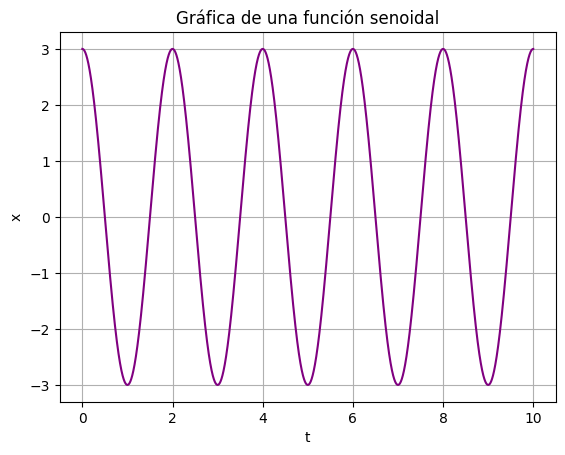

In [2]:
#Primero importamos todas las librerías a utilizar.
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy import special

t = np.arange(0,10,0.001) #vector tiempo definido de 0 hasta 10 con pasos de 0.001.
x = 3*np.cos(np.pi*t) #señal continua senoidal
plt.figure()
plt.plot(t,x, color="purple")
plt.xlabel('t'), plt.ylabel('x')
plt.grid()
plt.title("Gráfica de una función senoidal")
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


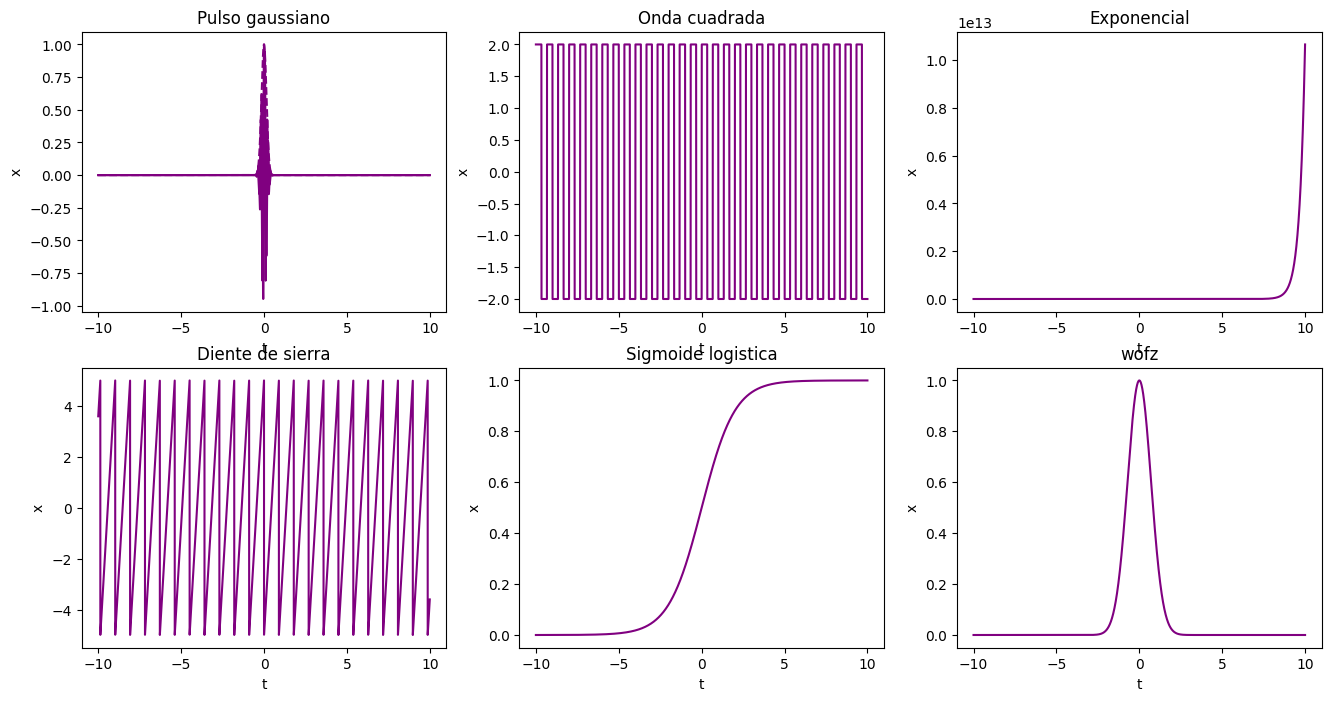

In [3]:
#graficaremos ciertas señales básicas mediante funciones

#ningún plt.figure ni plt.show entre las gráficas
#solo al inicio irá el plt.figure que definirá el tamaño de la matriz de figuras
#solo al final del código irá el plt.show de todas las gráficas

plt.figure(figsize=(16,8))

#La primera gráfica será el Pulso gaussiano
#El pulso Gaussiano tiene varias salidas con varias componentes a diferencia de las demás señales
plt.subplot(231) #número de filas y columnas y el número de la gráfica, es la posición que tendrá en la matriz de figuras.
t = np.arange(-10,10,0.001)
i, q, e = signal.gausspulse(t, fc=5, retquad=True,
retenv=True)
plt.plot(t, i, t, q, t, e, '--', color = "purple")
plt.title("Pulso gaussiano")
plt.xlabel('t')
plt.ylabel('x')

#La segunda gráfica será la onda cuadrada
plt.subplot(232) #número de filas y columnas y el número de la gráfica, es la posición que tendrá en la matriz de figuras.
x2 = 2*signal.square(3*np.pi*t)
plt.plot(t,x2, color = "purple")
plt.title("Onda cuadrada")
plt.xlabel('t')
plt.ylabel('x')

#La tercera gráfica será la exponencial
plt.subplot(233) #número de filas y columnas y el número de la gráfica, es la posición que tendrá en la matriz de figuras.
x3 = np.exp(3*t)
plt.plot(t,x3, color = "purple")
plt.title("Exponencial")
plt.xlabel('t')
plt.ylabel('x')

#La cuarta gráfica será el Diente de sierra
plt.subplot(234) #número de filas y columnas y el número de la gráfica, es la posición que tendrá en la matriz de figuras.
x4 = 5*signal.sawtooth(7*t)
plt.plot(t,x4, color = "purple")
plt.title("Diente de sierra")
plt.xlabel('t')
plt.ylabel('x')

#La quinta gráfica será la sigmoide logística
plt.subplot(235) #número de filas y columnas y el número de la gráfica, es la posición que tendrá en la matriz de figuras.
x5 = special.expit(t)
plt.plot(t,x5, color = "purple")
plt.title("Sigmoide logistica")
plt.xlabel('t')
plt.ylabel('x')

##La sexta gráfica será la wofz
plt.subplot(236) #número de filas y columnas y el número de la gráfica, es la posición que tendrá en la matriz de figuras.
x6 = special.wofz(t)
plt.plot(t,x6, color = "purple")
plt.title("wofz")
plt.xlabel('t')
plt.ylabel('x')

plt.show() #único plt.show()

Con base en la observación de las señales anteriores, a continuación estará la clasificación de estas en señales pares e impares, señales de energía y potencia, y señales periódicas y no periódicas según corresponda.

Además, se presentará el período fundamental de aquellas señales periódicas.

In [4]:
#Tabla
from tabulate import tabulate
table = [
    ['Señal', 'Par/Impar','Energia/Potencia', 'P/NP','Periodo'],
    ['Pulso Gaussiano','Ni par ni impar','Energía','NP','No hay periodo'],
    ['Onda cuadrada','Impar','Potencia','P','2/3'],
    ['Exponencial','Ni par ni impar','Ni energía de potencia','NP','No hay periodo'],
    ['Diente de sierra','Impar','Potencia','P','2π/7'],
    ['Sigmoide logística','Impar','Ni energía ni potencia','NP','No hay periodo'],
    ['Wofz','Par','Energía','NP','No hay periodo']
    ]

print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))
#headers='firstrow' -> titulos "primera fila"
#tablefmt='fancy_grid' of 'grid' ->contorno

#El periodo de la señal de la onda cuadrada es T=2π/w, debido a que x2 tiene w=3π el periodo de esta señal es T=2/3
#El periodo de la señal diente de sierra es T=2π/w, debido a que x4 tiene w=7, el periodo de esta señal es T=2π/7
#w es la frecuencia angular

╒════════════════════╤═════════════════╤════════════════════════╤════════╤════════════════╕
│ Señal              │ Par/Impar       │ Energia/Potencia       │ P/NP   │ Periodo        │
╞════════════════════╪═════════════════╪════════════════════════╪════════╪════════════════╡
│ Pulso Gaussiano    │ Ni par ni impar │ Energía                │ NP     │ No hay periodo │
├────────────────────┼─────────────────┼────────────────────────┼────────┼────────────────┤
│ Onda cuadrada      │ Impar           │ Potencia               │ P      │ 2/3            │
├────────────────────┼─────────────────┼────────────────────────┼────────┼────────────────┤
│ Exponencial        │ Ni par ni impar │ Ni energía de potencia │ NP     │ No hay periodo │
├────────────────────┼─────────────────┼────────────────────────┼────────┼────────────────┤
│ Diente de sierra   │ Impar           │ Potencia               │ P      │ 2π/7           │
├────────────────────┼─────────────────┼────────────────────────┼────────┼──────

* A continuación se presenta la multiplicación de ***una señal de onda cuadrada (impar) por una señal de onda wofz (par)***. La señal resultante es una señal impar no periódica con una amplitud que empieza y termina en cero pero a medida que se acerca al cero de la recta numérica esta amplitud crece gracias a la naturaleza de la onda Wofz.

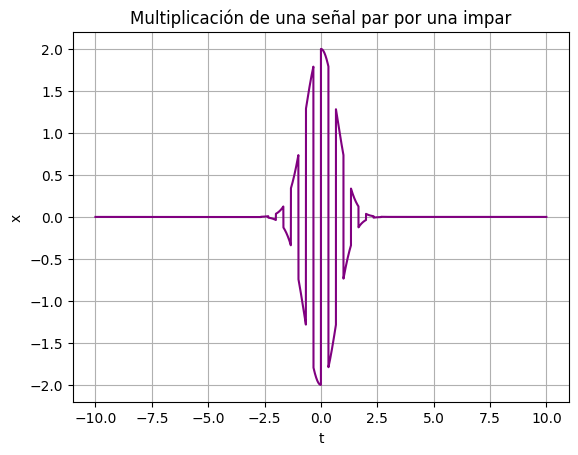

In [5]:
#Primero importamos todas las librerías a utilizar.
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy import special

t = np.arange(-10,10,0.001)
x = x = 2*signal.square(3*np.pi*t)*special.wofz(t)
plt.figure()
plt.plot(t,x, color="purple")
plt.xlabel('t'), plt.ylabel('x')
plt.grid()
plt.title("Multiplicación de una señal par por una impar")
plt.show()

* A continuación se presenta la multiplicación de ***dos señales de onda Wofz (señales pares)***. Las observaciones de esta señal resultante son que se obtiene una nueva señal par pero no periódica.

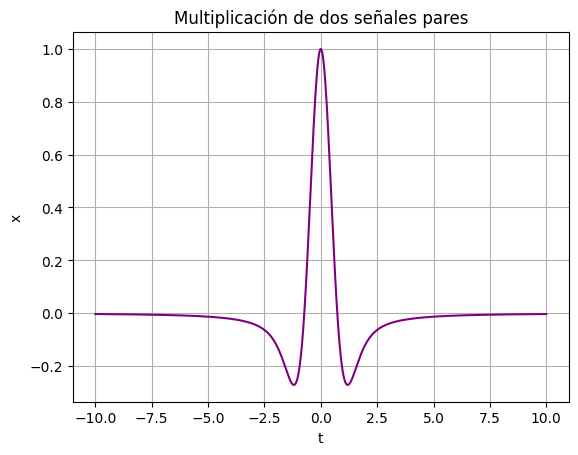

In [6]:
#Primero importamos todas las librerías a utilizar.
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy import special

t = np.arange(-10,10,0.001)
x = special.wofz(t)*special.wofz(t)
plt.figure()
plt.plot(t,x, color="purple")
plt.xlabel('t'), plt.ylabel('x')
plt.grid()
plt.title("Multiplicación de dos señales pares")
plt.show()

* A continuación se presenta la multiplicación de ***una señal de onda cuadrada y una señal sigmoide logística (ambas señales impares)***. Las observaciones de esta señal resultante son las siguientes: se obtiene una señal impar y la amplitud de esta varía con el tiempo, empezando en cero, y se puede apreciar que aumenta y oscila a medida que t aumenta. Al final de la gráfica, esta se empieza a ver igual a la onda cuadrada.

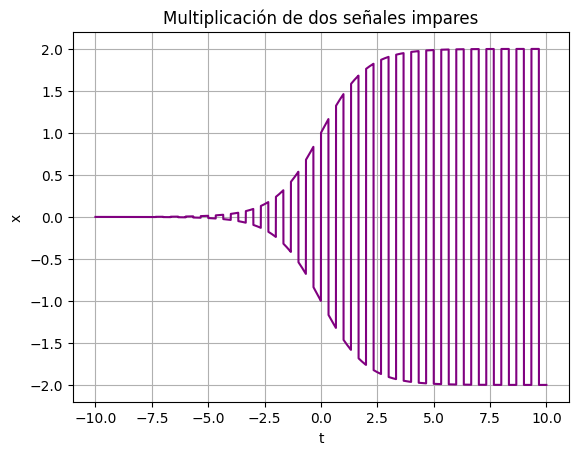

In [7]:
#Primero importamos todas las librerías a utilizar.
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy import special

t = np.arange(-10,10,0.001)
x = x = 2*signal.square(3*np.pi*t)*special.expit(t)
plt.figure()
plt.plot(t,x, color="purple")
plt.xlabel('t'), plt.ylabel('x')
plt.grid()
plt.title("Multiplicación de dos señales impares")
plt.show()

**Parte 2. Análisis de señales de tiempo discreto.**

En esta sección se generarán señales senoidales de tiempo discreto.


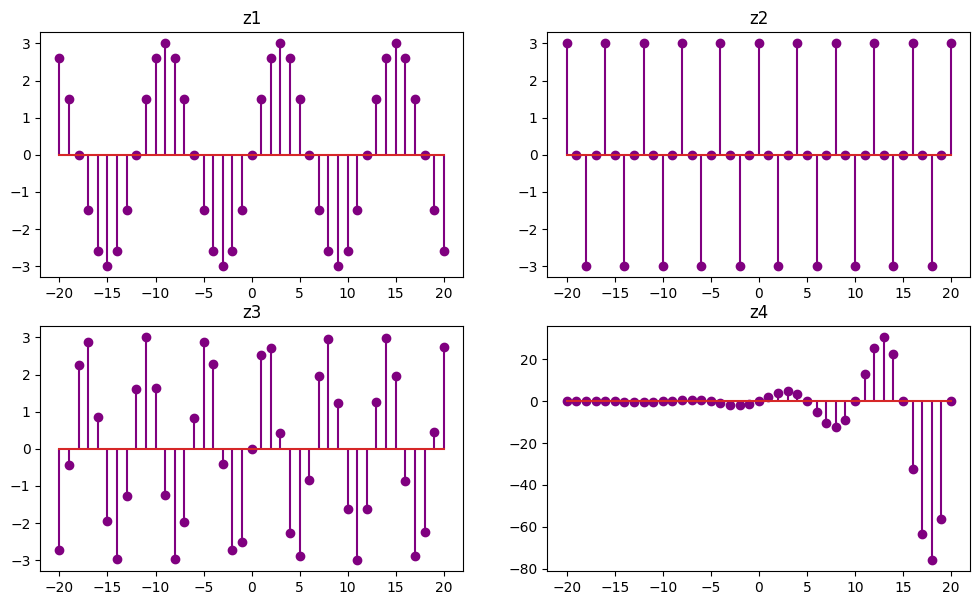

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy import special

n = np.arange(-20,21) #definimos el rango de valores de n
plt.figure(figsize=(12,7)) #empezamos la matriz de figuras y especificamos el tamaño

z1 = 3*np.sin(np.pi/6*n) #primera señal, z1:3*sin(pi/6*n)
plt.subplot(2,2,1), plt.stem(n,z1, "purple"), plt.title('z1')

z2 = 3*np.cos(np.pi/2*n) #segunda señal, z2: 3*cos(pi/2*n)
plt.subplot(2,2,2), plt.stem(n,z2, "purple"), plt.title('z2')

z3 = 3*np.sin(n) #tercera señal, z3: 3*sin(n)
plt.subplot(2,2,3), plt.stem(n,z3, "purple"), plt.title('z3')

z4 = 3*np.sin(np.pi/5*n)*1.2**n #cuarta señal (multiplicación de dos señales), z4: 3*sin(pi/5*n)*1.2**n
plt.subplot(2,2,4), plt.stem(n,z4, "purple"), plt.title('z4')

plt.show()


En base a las formas de onda de las señales; se mostrará a continuación si son periódicas, y si lo son, se mostrarán su períodos.


In [9]:
#Tabla
from tabulate import tabulate
table = [
    ['Señal', 'P/NP','Periodo'],
    ['z1','P','12'],
    ['z2','P','4'],
    ['z3','NP','No hay periodo'],
    ['z4','NP','No hay periodo'],
    ]

print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))
#headers='firstrow' -> titulos "primera fila"
#tablefmt='fancy_grid' of 'grid' ->contorno

#El periodo de la señal z1 es 12 ya que se repite cada 12 veces la señal.
#El periodo de la señal z3 es 4 ya que se repite cada 4 veces la señal.

╒═════════╤════════╤════════════════╕
│ Señal   │ P/NP   │ Periodo        │
╞═════════╪════════╪════════════════╡
│ z1      │ P      │ 12             │
├─────────┼────────┼────────────────┤
│ z2      │ P      │ 4              │
├─────────┼────────┼────────────────┤
│ z3      │ NP     │ No hay periodo │
├─────────┼────────┼────────────────┤
│ z4      │ NP     │ No hay periodo │
╘═════════╧════════╧════════════════╛


**Parte 3. Generación y ejecución de señales de audio**

* Generación de una nota musical empleando una señal senoidal:

In [10]:
from IPython.display import Audio #paquete que permite ejecutar sonidos desde archivos .wav o desde arreglos numéricos.
frecuencia = 261.63 # Nota Do
fs = 3000 # frecuencia de muestreo
duracion = 10 # duración de la nota
t = np.linspace(0, duracion, duracion * fs, False)
#linspace es el comando de la función, le damos el límite superior, el inferior, el número de elementos y él calcula el tamaño paso.
nota = np.sin(frecuencia * t * 2 * np.pi) #definimos la nota
# Comenzar reproducción
Audio(nota,rate=fs) #rate es la frecuencia de muestreo

* Generación de una nota musical empleando una señal senoidal como se mostró anteriormente pero con la frecuencia de una nota diferente.

In [11]:
from IPython.display import Audio #paquete que permite ejecutar sonidos desde archivos .wav o desde arreglos numéricos.
frecuencia = 440 # Nota La
fs = 300000 # frecuencia de muestreo
duracion = 10 # duración de la nota
t = np.linspace(0, duracion, duracion * fs, False)
#linspace es el comando de la función, le damos el límite superior, el inferior, el número de elementos y él calcula el tamaño paso.
nota = np.sin(frecuencia * t * 2 * np.pi) #definimos la nota
# Comenzar reproducción
Audio(nota,rate=fs) #rate es la frecuencia de muestreo

* Ahora, en vez de una señal senoidal se muestra una señal Diente de sierra de la frecuencia original (440Hz).

In [12]:
from IPython.display import Audio
frecuencia = 440 # Nota La
fs = 3000 # frecuencia de muestreo
duracion = 10 # duración de la nota
t = np.linspace(0, duracion, duracion * fs, False)
#linspace es el comando de la función, le damos el límite superior, el inferior, el número de elementos y él calcula el tamaño paso.
nota = signal.sawtooth(frecuencia * t * 2 * np.pi) #definimos la nota
# Comenzar reproducción
Audio(nota,rate=fs) #rate es la frecuencia de muestreo

**IV. Análisis de resultados.**

1.   ¿Cuál es el requisito para que una señal muestreada represente con exactitud la forma de onda de una señal de tiempo continuo?

Para que una señal muestreada (discreta) muestre con exactitud la forma de una onda continua se recomienda usar la tasa de Nyquist, esta brinda una buena aproximación siendo uno de los métodos de interpolación más simples. Si se usa una frecuencia de muestreo insuficiente, estas no representarán la señal con exactitud, y si se toma una frecuencia de muestreo mucho mayor a la frecuencia de Nyquist se habla de un caso de sobremuestreo y esto significa que es muy probbable que se estén obteniendo más datos de los realmente necesarios.  


2.  ¿Por qué no todas las señales senoidales de tiempo discreto son periódicas?

Las señales periódicas de tiempo discreto se caracterizan porque hay un valor entero positivo N para el cual:

`x[n]=xn+N,∀n`


Donde N es el período fundamental y se define como el valor entero más pequeño que satisfice esta condición. No tiene unidades o se usa
“muestras” como unidades.

Ω es la frecuencia fundamental y se define: Ω=2𝜋N

Las unidadesde la frecuencia para señales de tiempo discreto son radianes(rad).

En el caso de este laboratorio para las señales senoidales z3 y z4 no se cumple que exista ese valor N, por lo tanto, no son periódicas.


3.   ¿Cuál propiedad del sonido cambia al variar la frecuencia? ¿Qué ocurre cuando esta aumenta?

La propiedad de sonido que cambia al variar la frecuencia es el tono. Escuchar un tono bajo o alto depende del número de vibraciones por segundo (frecuencia). Aumenta de manera proporcional, eltre más alta sea la frecuencia de las vibraciones, mayor será el tono. [2]


4.   ¿Cuál propiedad del sonido cambia al variar la forma de onda de la señal?

La propiedad del sonido que se afecta al variar la forma de onda es el timbre, esta es una cualidad del sonido que permite distingur aquellos sonidos de igual intensidad y frecuencia emitidos por varias fuentes. Por lo general, la frecuencia de un sonido no es la única, sino que existe una fundamental y otras de menor intensidad, el timbre está relacionado con esas otras frecuencias que acompañan a la fundamental. [3]

**V. Conclusiones.**

Este laboratorio fue realizado exitosamente permitiendo analizar las señales de onda discretas y continuas, pudiendo clasificarlas según su periodicidad, su simetría y en si eran de energía, potencia o de ninguna de las dos como se puso tener el caso. Se analizaron señales de sonido de manera dinámica gracias al paquete IPython. Cabe resaltar que no se profundizó mucho en los tipos de señales básicas que graficamos debido a la poca información que se encontró en la revisión de la literatura.

**VI. Referencias.**

[1] 1.5. Scipy: computación científica de alto nivel — Scipy lecture notes. (s/f). Github.io. Recuperado el 18 de febrero de 2024, de https://claudiovz.github.io/scipy-lecture-notes-ES/intro/scipy.html

[2] Jupyter and the future of IPython — IPython. (s/f). Ipython.org. Recuperado el 18 de febrero de 2024, de https://ipython.org

[3] Tipo de tono y frecuencia. (s/f). Auersignal.com. Recuperado el 18 de febrero de 2024, de https://www.auersignal.com/es/datos-tecnicos/indicacion-acustica/tono-y-frecuencia/

[4] Ochoa, F., & Johana, S. (2019). Estudio de las propiedades características de las cónicas a partir de experiencias físicas mediante el uso del concepto de linealización. https://concepto.de/sonido/


